### **ASSIGNMENT-1: OBJECT RECOGNITION**

**IMPORTING REQUIRED LIBRARIES AND PACKAGES:**

In [1]:
import numpy as np                                                    #importing necessary libraries and packages
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from datetime import datetime

**LOADING THE CIFAR10 DATASET:**

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()      #loading the cifar10 training and testing datasets

170500096/170498071 [==============================] - 2s 0us/step


VIEWING THE IMAGES AN THEIR LABELS PRESENT IN THE DATASET:

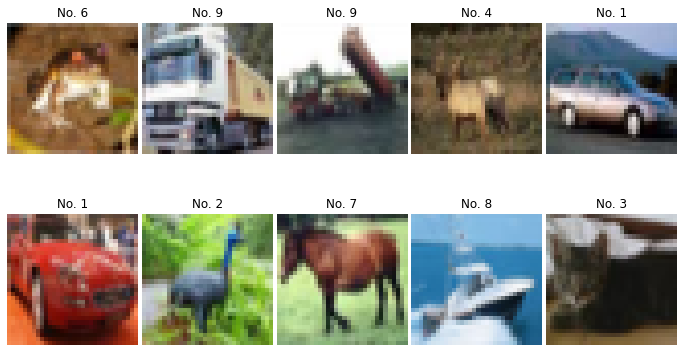

In [3]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,7),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( x_train[image_index])
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

**DATA PREPROCESSING:**

In [4]:
x_train.shape                                 #printing x_train shape        

(50000, 32, 32, 3)

In [5]:
y_train.shape                                #printing y_train shape

(50000, 1)

In [6]:
set(y_train.flatten())                        #creates a set of total classes present in y_train, set is used as it can hold unique elements only

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [7]:
# number of classes
n = len(set(y_train.flatten()))              #len function writtens the total number of elements present in the set
print("number of classes:", n)                                     

number of classes: 10


In [8]:
X_train = x_train.astype('float32')/255        #normalizing the x_train and y_train datas
X_test = x_test.astype('float32')/255

In [9]:
Y_train = to_categorical(y_train, 10)          #to_categorical performs one_hot encoding
Y_test = to_categorical(y_test, 10)         
print("X_train.shape:", X_train.shape)         #printing the shape of x_train and y_train
print("Y_train.shape", y_train.shape)

X_train.shape: (50000, 32, 32, 3)
Y_train.shape (50000, 1)


**MODEL BUILDING:**

**COMMON CODING TERMS USED:**<br/>
1.**Seqential()** - creates an linear stack of layers;<br/>
2.**Conv2D** - creates an 2D convolutional layer and creates a convolution kernel that is convolved with the layer to produce a tensor of outputs. Convolution Layers uses Convolution filters to build feature maps;<br/>
3.**Activation function** - Exponential Linear Unit (elu) type activation function is used to introduce non-linearity;<br/>
4.**Kernel_initializer** - 'he_uniform' is used as the kernel_initializer which defines the initial weights of the layers;<br/>
5.**Kernel_regularizer** - 'L2' class kernel_regularizer is used with decay of 1e-4 and it applies a penalty on layer's parameters during optimization. These penalities are summed into the loss function that the network optimizes;<br/>
6.**Padding** - padding ='same' results with the ouput  having same height/width dimensions as the input;<br/>
7.**input_shape** - it takes a input image of size 32 x 32 x 3;<br/>
8.**MaxPooling** - it calculates the largest value in each feature maps generated by the convolution filters and it helps in dimensionality reduction;<br/>
9.**BatchNormalization** - it normalizes the output using the mean and standard deviation of input:<br/>
10.**Dropout** - it is a technique used to ignore the selected neurons randomly during training and it prevents the Neural Networks from overfitting;<br/>
11.**Flatten** - Flattening is converting the data into a 1D array for inputting it to the next layer, flaten is a function that converts the pooled feature map to a single column which is to be passed tothe fully connected layer;<br/>
12.**Dense** - it adds a fully connected layer to thr Neural Network;<br/>
13.**Softmax** - it is the activation function used in the output layer to produce the output for multi-classification problems, in this problems it classifies the input into 10 output classes;<br/>



In [10]:
#building a CNN model;

#creating a sequential type layers;
model = Sequential()

#CNN layers;
model.add(Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

#flattening the output of convolution layers;
model.add(Flatten())

#adding a hidden layers to the model
model.add(Dense(512, activation='elu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(512, activation='elu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#adding a output layer
model.add(Dense(10, activation='softmax'))

Thus, a CNN model with one input layer, eight convolution layers, six max pooling layers, six dropout layers, two hidden layers and one output layer is created.

In [11]:
model.summary()               #it prints the summary of the model which consists of all layers added to model in sequential order

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

**COMPILING THE MODEL:**

**COMMON CODING TERMS USED**:<br/>
1.**Optimizers** - Adam is used as an optimizer, it is a stochastic gradient descent method that is based on adaptive estimation of first and second-order moments.<br/>
2.**lr - it stands for learning rate that determines the step size at each iteration while moving toward a minimum of a loss function;<br/>
3.Decay** - it causes the learning rates to decay;<br/>
4.**categorical_crossentropy** - it is used as a loss function for multi class classification problems and it quantifies the difference between probability distributions;<br/>
5.**metrics** - it is a function used to judge the performance of the model, here accuracy is used as a metric;<br/>

In [12]:
opt = optimizers.Adam(lr = 0.001, decay = 1e-5)             # compiling the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

**MONITORING THE MODEL PERFORMANCE:**



1. **ReduceLROnPlateau** - it is a **callback** which **monitors** a quantity such as loss, accuracy, val_loss or val_accuracy and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced; **Mode**='max' reduces the learning rate, when the quantity monitored has stopped increasing;  **min_lr** is the lower bound of the learning rate; **patience:** number of epochs with no improvement after which learning rate will be reduced;
2. **EarlyStopping** - it is a callback which monitors a quantity such as loss, accuracy, val_loss or val_accuracy and if no improvement is seen for a 'patience' number of epochs, the training will be ended;



In [13]:
rlr = ReduceLROnPlateau(monitor='val_accuracy', mode ='max', factor=0.5, min_lr=1e-7, verbose = 1, patience=10) #rlr-reduce learning rate and es-early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose = 1, patience=50)   #initializing call backs

**VISUALIZING THE MODEL PERFORMANCE THROUGH CALL BACKS:**



*   TensorBoard is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space.



**FITTING THE MODEL ON TRAIN DATASETS:**

In [ ]:
model.fit(X_train, Y_train, batch_size = 64,                    #fitting the model with train datasets and callbacks
                                 validation_split=0.1, 
                                 epochs = 400, verbose = 1,
                                 callbacks = [rlr, es,tensorboard_callback])

Epoch 1/400
  1/704 [..............................] - ETA: 0s - loss: 4.0001 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
704/704 [==============================] - 30s 43ms/step - loss: 1.9530 - accuracy: 0.4075 - val_loss: 1.6054 - val_accuracy: 0.5362
Epoch 2/400
704/704 [==============================] - 30s 42ms/step - loss: 1.3526 - accuracy: 0.5920 - val_loss: 1.2044 - val_accuracy: 0.6652
Epoch 3/400
704/704 [==============================] - 30s 42ms/step - loss: 1.1505 - accuracy: 0.6662 - val_loss: 1.0033 - val_accuracy: 0.7294
Epoch 4/400
704/704 [==============================] - 30s 42ms/step - loss: 1.0371 - accuracy: 0.7136 - val_loss: 0.8819 - val_accuracy: 0.7680
Epoch 5/400
704/704 [==============================] - 30s

**PREDICTING THE TEST DATAS USING THE MODEL:**

In [ ]:
y_pred=model.predict(X_test)                         #predicting the x_test datas

array([[1.3483273e-06, 2.0746550e-06, 1.9876861e-06, ..., 2.9115579e-09,
        2.7325663e-11, 5.2698379e-09],
       [3.7114231e-10, 4.8354587e-10, 3.2579791e-14, ..., 6.2576046e-15,
        1.0000000e+00, 5.1652158e-11],
       [7.1625184e-10, 5.0772604e-04, 2.2198532e-09, ..., 8.7734708e-07,
        9.9949121e-01, 1.3873549e-07],
       ...,
       [5.3836757e-10, 1.6033089e-10, 1.5325679e-06, ..., 2.4745714e-07,
        2.9401076e-10, 3.0812472e-10],
       [1.7382065e-06, 9.9998236e-01, 3.7363911e-08, ..., 3.0619940e-10,
        1.0751870e-10, 3.7417665e-09],
       [4.2883207e-11, 1.2592205e-10, 4.8096553e-12, ..., 9.9999869e-01,
        2.1020087e-12, 5.0500511e-12]], dtype=float32)

**EVALUATING THE MODEL PERFORMANCE ON TEST DATASETS:**

In [ ]:
model.evaluate(X_test,Y_test)                 #evaluating the loss and accuracy of actual and predicted values

313/313 [==============================] - 3s 11ms/step - loss: 0.6836 - accuracy: 0.8930


[0.6835514307022095, 0.8930000066757202]

**BUILDING A CNN MODEL ON TOP OF BUILT-IN VGG19 MODEL:**

In [ ]:
INPUT_SHAPE = (32, 32, 3)                # defining input shape

vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False,    
                                               input_shape=INPUT_SHAPE)    #importing VGG19model

vgg_layers.summary()                     #printing the summary of VGG19 model

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
# defining sequential model
model_1 = tf.keras.models.Sequential()
                                         
# adding the vgg convolutional base model
model_1.add(vgg_layers)

# adding flatten layer
model_1.add(tf.keras.layers.Flatten())

# adding dense layers with some dropout
model_1.add(tf.keras.layers.Dense(256, activation='relu'))
model_1.add(tf.keras.layers.Dropout(rate=0.3))
model_1.add(tf.keras.layers.Dense(256, activation='relu'))
model_1.add(tf.keras.layers.Dropout(rate=0.3))

# adding output layer
model_1.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

NOTE:<br/>
*   model=tf.kears.models.sequential() can also be initialized as model=sequential() as we imported all the necessary packages earlier

**COMPILING THE MODEL:**

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, 
                                               restore_best_weights=True,
                                               verbose=1)

vgg_tuned = model_1.fit(X_train, Y_train,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=100,
                    verbose=1)

Epoch 1/100
1407/1407 [==============================] - 34s 24ms/step - loss: 1.1492 - accuracy: 0.6121 - val_loss: 0.7285 - val_accuracy: 0.7604
Epoch 2/100
1407/1407 [==============================] - 33s 24ms/step - loss: 0.7119 - accuracy: 0.7689 - val_loss: 0.5940 - val_accuracy: 0.8022
Epoch 3/100
1407/1407 [==============================] - 33s 24ms/step - loss: 0.5598 - accuracy: 0.8178 - val_loss: 0.5881 - val_accuracy: 0.8086
Epoch 4/100
1407/1407 [==============================] - 33s 24ms/step - loss: 0.4560 - accuracy: 0.8541 - val_loss: 0.5056 - val_accuracy: 0.8324
Epoch 5/100
1407/1407 [==============================] - 34s 24ms/step - loss: 0.3646 - accuracy: 0.8816 - val_loss: 0.4774 - val_accuracy: 0.8438
Epoch 6/100
1407/1407 [==============================] - 33s 24ms/step - loss: 0.2853 - accuracy: 0.9077 - val_loss: 0.5297 - val_accuracy: 0.8462
Epoch 7/100
1407/1407 [==============================] - 33s 24ms/step - loss: 0.2239 - accuracy: 0.9273 - val_loss: 0

**PREDICTING THE TEST DATAS USING THE VGG19 MODEL:**

In [ ]:
y_pred_1=model_1.predict(X_test)                         #predicting the x_test datas

array([[2.46628857e-04, 6.12606236e-04, 1.32668344e-03, ...,
        1.85885897e-03, 2.37092216e-04, 5.10157202e-04],
       [1.01280154e-03, 2.25411262e-03, 3.94705130e-05, ...,
        4.50803282e-06, 9.96443212e-01, 1.38480624e-04],
       [2.16745455e-02, 8.25097226e-03, 8.01353424e-04, ...,
        2.28308505e-04, 9.62711632e-01, 3.52672744e-03],
       ...,
       [1.80890402e-05, 6.04502111e-06, 1.86757738e-04, ...,
        2.53281556e-04, 3.32181153e-05, 3.68830661e-05],
       [4.06896584e-02, 8.98553133e-01, 1.42469388e-02, ...,
        2.70106550e-03, 5.40876063e-03, 1.64408516e-02],
       [1.19658525e-05, 7.66907942e-06, 2.83182162e-05, ...,
        9.99062598e-01, 3.32028208e-06, 2.86285594e-05]], dtype=float32)

**EVALUATING THE VGG19 MODEL PERFORMANCE ON TEST DATASETS:**

In [ ]:
model.evaluate(X_test,Y_test)                 #evaluating the loss and accuracy of actual and predicted values

313/313 [==============================] - 3s 8ms/step - loss: 0.5005 - accuracy: 0.8384


[0.5005126595497131, 0.8384000062942505]

AS the test accuracy of the VGG19 based model is not greater than the previous model, the previously built cnn model is used for new test data predictions.

### TO CHECK THE PREDICTIONS OF CNN MODEL:

In [ ]:
y_pred[0]

In [ ]:
np.argmax(y_predicted[0])

In [ ]:
plt.matshow(X_test[0])

**IMPORTING NEW DATASETS**

In [ ]:
import pandas as pd                       #loading the new dataset and storing it in a dataframe
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,104,108,89,100,104,88,99,103,90,101,106,95,105,110,99,108,110,109,117,116,119,125,123,125,130,128,134,140,138,140,...,184,178,177,172,190,188,184,220,219,214,195,193,187,176,174,169,175,173,168,192,189,185,185,182,178,168,165,161,178,176,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,110,103,105,112,104,105,114,109,105,116,112,106,115,110,108,115,108,107,115,107,104,115,106,104,116,108,108,119,115,108,...,149,153,159,164,132,140,142,134,144,145,112,119,118,108,115,111,114,124,122,106,118,116,101,113,108,100,111,102,99,110,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,93,49,40,52,36,18,24,18,31,38,27,79,91,61,104,117,78,72,84,52,68,79,52,122,131,85,104,113,67,77,...,139,174,188,139,182,198,150,179,194,147,175,186,142,187,195,158,176,191,142,169,190,132,177,193,144,180,189,147,175,190,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,221,233,226,225,231,225,226,223,223,223,223,227,226,231,229,228,236,229,228,236,230,229,236,228,227,235,227,226,234,225,...,20,111,41,28,111,63,60,120,92,98,138,117,129,153,140,158,172,161,187,188,174,205,195,182,212,199,185,216,197,186,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,74,144,39,76,140,37,79,130,38,77,135,40,75,142,43,72,145,47,71,146,47,73,140,43,75,140,39,77,143,37,...,149,42,71,135,43,72,125,42,72,122,51,72,117,64,70,109,65,72,99,53,76,113,35,75,136,30,81,140,34,79,133,41,77,130,44,75,133,42,73,144


**PREPROCESSING THE NEW DATASETS:**

In [ ]:
test_data1=np.array(test_data)                   #converting the dataframe into array
test_data1=test_data1.reshape(2000,32,32,3)      #reshaping the array

In [ ]:
test_data1 = test_data1.astype('float32')/ 255   #normalizing the new dataset

In [ ]:
test_data1.shape                                 #printing the shape of new dataset

(2000, 32, 32, 3)

**MAKING PREDICTIONS ON NEW DATASETS WITH BUILT MODEL:**

In [ ]:
predictions=model.predict(test_data1)   #making predictions on the new dataset

In [ ]:
data=np.argmax(predictions,axis=1)      #as softmax function produces outputs of 10 different classes, argmax is used to return the maximum value of that 10 outputs

**STORING THE PREDICTION RESULTS:**

In [ ]:
res = pd.DataFrame(data)            #converting the array into dataframe
res.index = test_data.index         #keeping the index position of res as a test_data variable
res.columns = ["predictions"]       #keeping the column position of res as a predictions variable

# To download the csv file locally
from google.colab import files           #importing files library
res.to_csv('prediction_results.csv')     #converting the res dataframe into an prediction_results csv file
files.download('prediction_results.csv') #down;oading the csv file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>